In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
import numpy as np

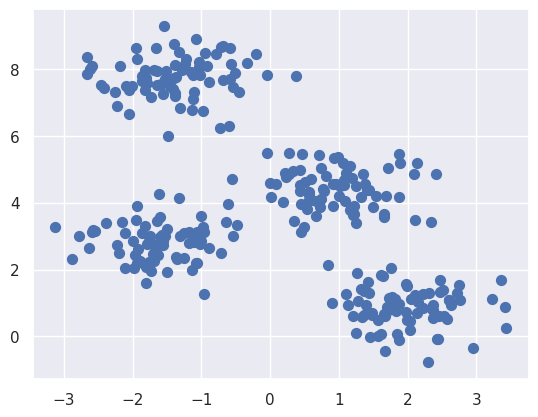

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

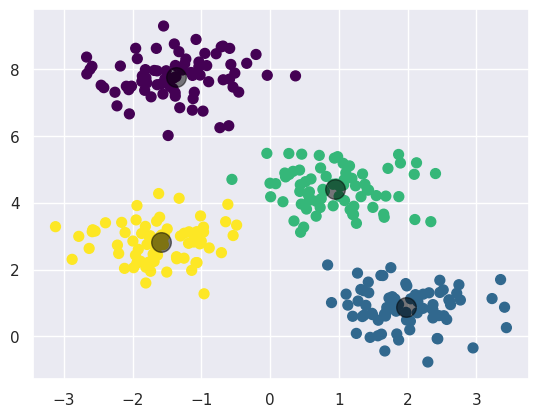

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
kmeans.cluster_centers_

array([[-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263]])

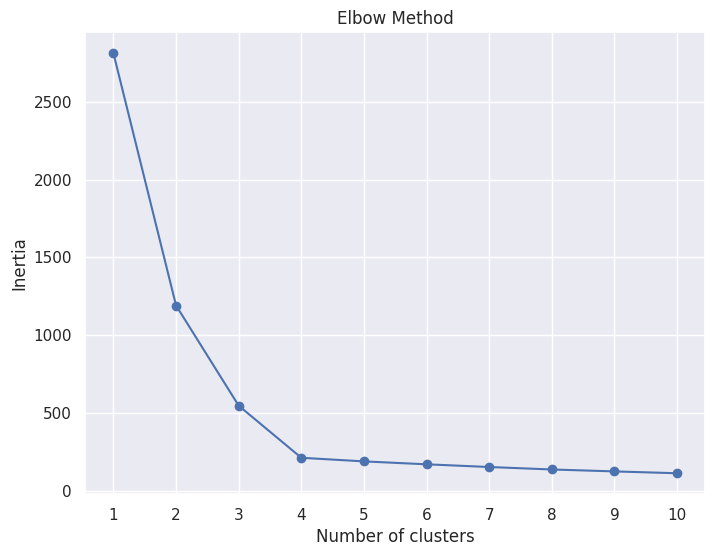

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

# Generate some sample data for demonstration
np.random.seed(42)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applying k-means with different number of clusters
inertia = []  # List to store the inertia for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
credit_df = pd.read_csv('Mall_Customers.csv')
credit_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
credit_df.shape

(200, 5)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# check for missing values
credit_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# normalize the features
from sklearn.preprocessing import StandardScaler, normalize
X = credit_df.iloc[:, 3:5].values # Columns of interest
print(X)
X = StandardScaler().fit_transform(X)
X = normalize(X)
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X)
    visualizer.poof()


For n_clusters = 2, silhouette score is 0.4705509597246642


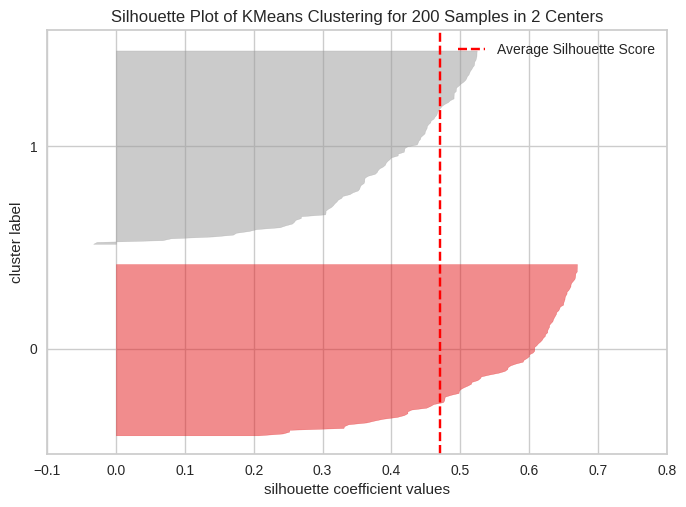

For n_clusters = 3, silhouette score is 0.6032007063012638


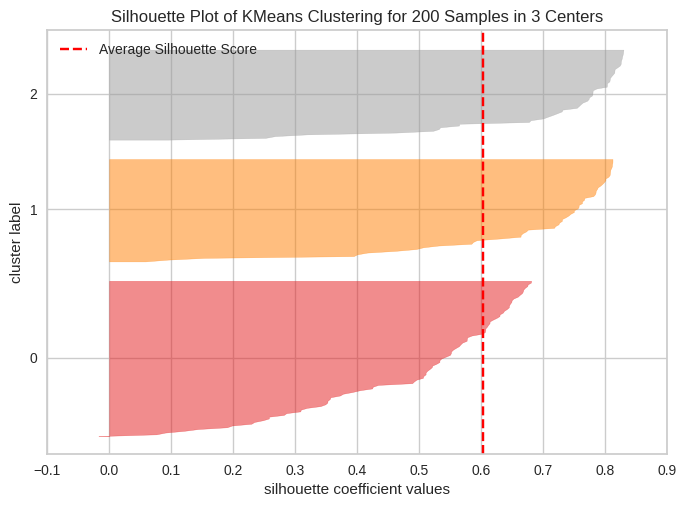

For n_clusters = 4, silhouette score is 0.6616413670429191


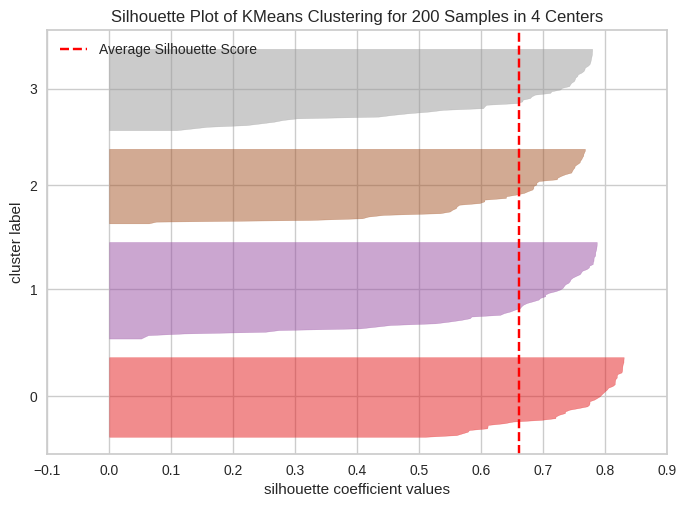

For n_clusters = 5, silhouette score is 0.6183363219711807


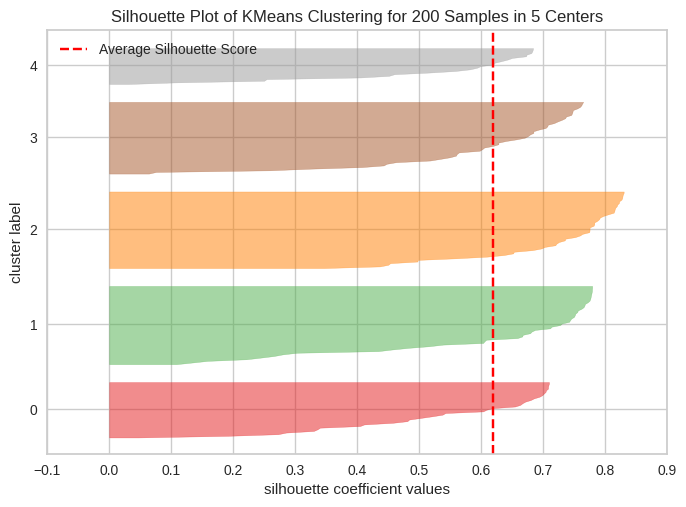

For n_clusters = 6, silhouette score is 0.5932920412415835


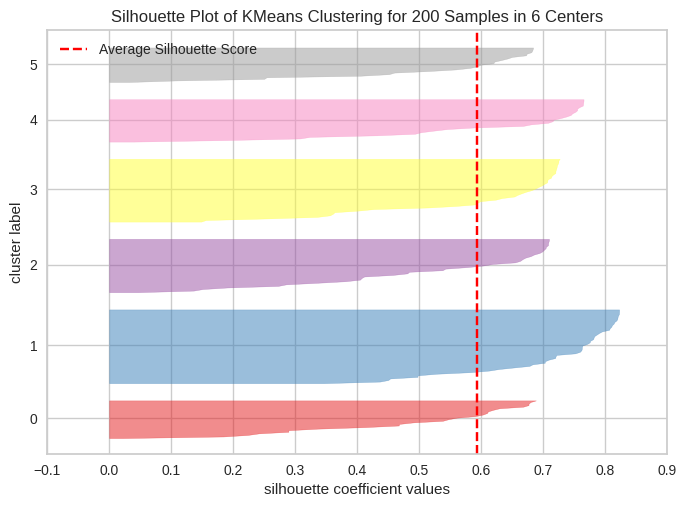

For n_clusters = 7, silhouette score is 0.565025605500701


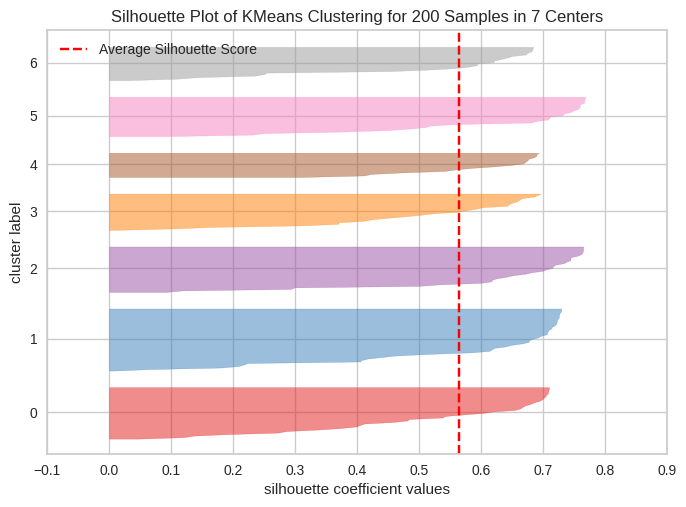

For n_clusters = 8, silhouette score is 0.566981632947897


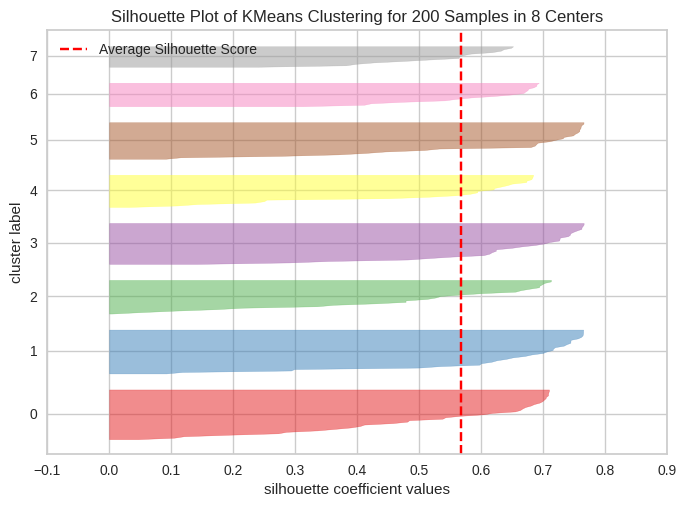

For n_clusters = 9, silhouette score is 0.5634985149316089


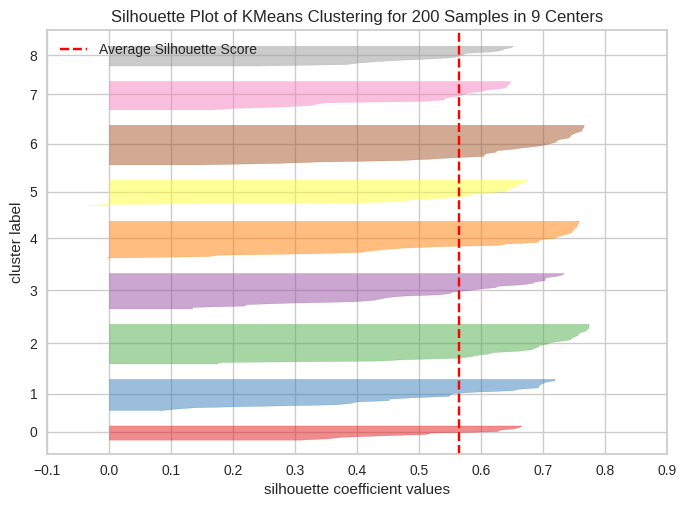

In [ ]:
silhouette_analysis(10)

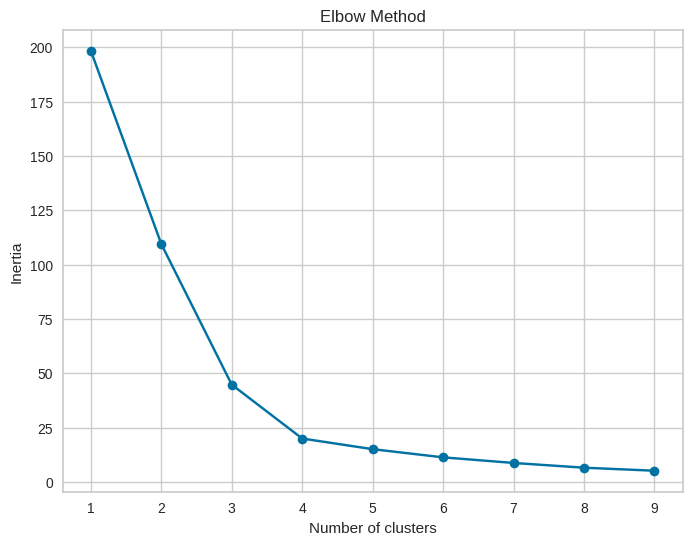

In [ ]:
# Applying k-means with different number of clusters
inertia = []  # List to store the inertia for each k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 10))
plt.show()

In [ ]:
# Apply k-means with the chosen number of clusters (assuming k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
credit_df['Cluster'] = cluster_labels

# Analyze the clusters
# This part involves statistical analysis of each cluster, for example:
#print(credit_df.groupby('Cluster').mean())

TypeError: Could not convert MaleFemaleFemaleFemaleMaleMaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleFemaleFemaleMaleMaleMaleFemaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleFemaleFemaleMaleMaleFemaleMaleMaleMaleFemaleMaleMaleFemaleMaleMaleFemaleMaleFemaleFemaleFemaleFemaleMaleFemaleFemaleMale to numeric

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s = 100, c = 'red', label = 'High Income, Low Spenders')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Low Income, High Spenders')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s = 100, c = 'green', label = 'Low Income, Low Spenders')
plt.scatter(X[cluster_labels == 3, 0], X[cluster_labels == 3, 1], s = 100, c = 'cyan', label = 'High Income, High Spenders')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:

To accomplish this task, we will use the K-Means clustering algorithm, a popular method for clustering in machine learning. Here's a step-by-step guide on how to implement this in Python, using the scikit-learn library.

Step 1: Import Libraries
First, you need to import the necessary libraries:

python
Copy code
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
Step 2: Load and Prepare Data
Load your dataset into a pandas DataFrame. For the sake of this example, let's assume you have a CSV file named data.csv.

python
Copy code
# Load dataset
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(data.head())
Step 3: Preprocess the Data
Standardize the features to ensure they have a mean of 0 and a standard deviation of 1. This helps in improving the performance of the clustering algorithm.

python
Copy code
# Selecting features (assuming all columns are features)
features = data.columns

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])
Step 4: Apply K-Means Clustering
Decide on the number of clusters, fit the K-Means model, and predict the cluster for each data point.

python
Copy code
# Determine the number of clusters (k)
k = 3  # You can use methods like the Elbow method to find the optimal k

# Fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Predict the clusters
data['Cluster'] = kmeans.labels_
Step 5: Visualize the Clusters (optional)
Visualizing the clusters can provide insights into the data and how the clusters are formed.

python
Copy code
# Plot the clusters (using first two features for 2D visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()
Step 6: Predict the Cluster for a New Data Point
Create a function that takes a new data point and predicts which cluster it belongs to, along with an explanation.

python
Copy code
def predict_cluster(new_data_point):
    # Standardize the new data point using the same scaler
    new_data_point_scaled = scaler.transform([new_data_point])

    # Predict the cluster
    cluster = kmeans.predict(new_data_point_scaled)[0]

    # Explanation (example: distance to cluster centroids)
    distances = kmeans.transform(new_data_point_scaled)
    explanation = f"Data point belongs to cluster {cluster} with distances {distances[0]}"

    return cluster, explanation

# Example usage
new_data_point = [5.1, 3.5, 1.4, 0.2]  # Replace with your data point
cluster, explanation = predict_cluster(new_data_point)
print(f"Cluster: {cluster}")
print(f"Explanation: {explanation}")